In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels =[]
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000022BEE003390>

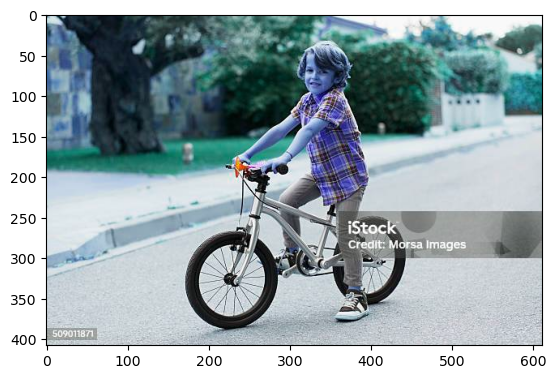

In [8]:
img = cv2.imread('boy.jpg')
plt.imshow(img)

In [9]:
ClassIndex , confidece,bbox = model.detect(img,confThreshold=0.5)

In [10]:
print(ClassIndex)

[1 2 1]


In [11]:
font_scale =3
font =cv2.FONT_HERSHEY_PLAIN
for ClassIndex,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(2500,0,0),2)
    cv2.putText(img,classLabels[ClassIndex-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,color=(0,255,0),thickness=3)

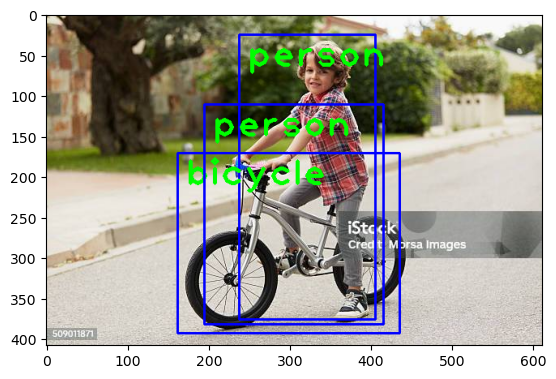

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

For the video

In [13]:
import cv2

# Open the video file
cap = cv2.VideoCapture('2954065-uhd_3840_2160_30fps.mp4')

# Check if video opened successfully
if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # Try opening webcam if video file fails
if not cap.isOpened():
    raise IOError('Cannot open the video')

# Define font properties for text overlay
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Desired width and height
width, height = 1280, 720  # Adjust the width and height as needed

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame
    frame = cv2.resize(frame, (width, height))

    # Assume `model.detect` and `classLabels` exist
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassIndex, confidence, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassIndex <= 80:
                cv2.rectangle(frame, boxes, (2500, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassIndex - 1], (boxes[0] + 10, boxes[1] + 40),
                            font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    # Display the frame in a window
    cv2.imshow('Video Playback', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture object and close windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

for webcam

In [14]:
import cv2

# Open the webcam (0 is the default camera)
cap = cv2.VideoCapture(0)

# Check if webcam opened successfully
if not cap.isOpened():
    raise IOError('Cannot access the webcam')

# Define font properties for text overlay
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Desired width and height (adjust these values as needed)
width, height = 1280, 720  # Example: Adjust these values to make the video larger or smaller

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame to the desired dimensions
    frame = cv2.resize(frame, (width, height))

    # Assume `model.detect` and `classLabels` exist
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassIndex, confidence, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassIndex <= 80:
                cv2.rectangle(frame, boxes, (2500, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassIndex - 1], (boxes[0] + 10, boxes[1] + 40),
                            font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    # Display the frame in a window
    cv2.imshow('Webcam Playback', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release webcam and close windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 